# ASSIGNMENT 1 - MONTY HALL

Students: Caporali Ilaria, Scialpi Matteo



## QUESTION 1

Let's sketch the events present in our problem:
$$C_i = "\text{The car is under the door i}"$$
$$X_i = "\text{The player chooses the door i}"$$
$$H_i = "\text{The host open the door i}"$$
with $i = 1, 2, 3$. \
The probability for the car to be behind one of the three doors is given by (using a frequentist definition):
\begin{equation}
\mathcal{P}(C_1) =\mathcal{P}(C_2) =\mathcal{P}(C_3) = \frac{1}{3}\,.
\end{equation}
The probability for the player to choose the first time one of the doors is given by
\begin{equation}
\mathcal{P}(X_1) = \mathcal{P} (X_2) = \mathcal{P}(X_3) = \frac{1}{3}
\end{equation}
As the exercise states, initially the player chooses the door labeled as 1. \



Now what we want to do is to evaluate the probability that the player has to win by choosing to switch door $P(C_2| H_3\,and\,X_1)$ after the host, that in this case knows where the car is, opens door 3.
To evaluate it, we have to apply the product rule starting from $\mathcal{P}(C_2\,and\,H_3|X_1)$, wich gives us
\begin{equation}
\mathcal{P}(C_2\,and\,H_3|X_1)=\mathcal{P}(C_2|X_1)\,\mathcal{P}(H_3|C_2\,and\,X_1)=\mathcal{P}(H_3|X_1)\,\mathcal(C_2|H_3\,and\,X_1)\,.
\end{equation}
This implies the following:
\begin{equation}
\mathcal{P}(C_2|H_3\,and\,X_1)=\frac{\mathcal{P}(C_2|X_1)\,\mathcal{P}(H_3|C_2\,and\,X_1)}{\mathcal{P}(H_3|X_1)}\,,
\end{equation}
which means that the probability of the car to be behind the door n. 2 (= to win changing door), given that the player had chosen the door n. 1 and that the host opened the door n.3 with a goat behind, is equal to the probability of the car to be behind the door n. 2, given that the player had chosen the door n. 1, multiplied by the probability for the door n.3 to be open by the host, given that the car is surely behind the door n.2 and that the player had chosen the door n. 1, all divided for the probability for the door to be open by the host, given that the player had chosen the door n. 1.\
Let's analize one term at time:
* $\mathcal{P}(C_2|X_1)$ was already calculated and we found that
\begin{equation}
\mathcal{P}(C_2|X_1)=\mathcal{P}(C_2)=\frac{1}{3}\,;
\end{equation}
* $\mathcal{P}(H_3|X_1)$ can be calculated via marginalization spanning the $C_i$ statements, which means to calculate (using the product rule in the second equality and the fact that the position of the car is independent on the player's choise)
\begin{equation}
\mathcal{P}(H_3|X_1)=\sum_i\mathcal{P}(C_i\,and\,H_3|X_1)=\sum_i\mathcal{P}(C_i|X_1)\,\mathcal{P}(H_3|C_i\,and\,X_1)=\sum_i\frac{1}{3}\,\mathcal{P}(H_3|C_i\,and\,X_1)
\end{equation}
or, more explicitly,
\begin{equation}
\mathcal{P}(H_3|X_1)=\frac{1}{3}\,\bigl[\mathcal{P}(H_3|C_1\,and\,X_1)+\mathcal{P}(H_3|C_2\,and\,X_1)+\mathcal{P}(H_3|C_3\,and\,X_1)\bigr]\,.
\end{equation}
In this particular question we suppose that the host knows where the car is, so when he has to choose which door to open after the contestant choice to pick door 1, he must exploit his information. If the car is behind the door 1, he has the same probability to open the door 2 as to open the door 3, since no car is behind those two doors. That implies $\mathcal{P}(H_3|C_1,X_1)=1/2$. If instead the car is in one of the two doors left, the host is forced to open the one with the goat. This implies $\mathcal{P}(H_3|C_2,X_1)=1$ and $\mathcal{P}(H_3|C_3,X_1)=0$. As a conclusion,
\begin{equation}
\mathcal{P}(H_3|X_1)=\frac{1}{3}\Bigl[\frac{1}{2}+1+0\Bigr]=\frac{1}{2}\,.
\end{equation}
Again here we can see that the result doesn't depend on the knowledge of the host because it holds anyway that
\begin{equation}
\mathcal{P}(H_3|C_2\,and\,X_1)+\mathcal{P}(H_3|C_3\,and\,X_1)=1\,.
\end{equation}
* Having understood the assignment, we found in the previous point that
\begin{equation}
\mathcal{P}(H_3|C_2\,and\,X_1)=1\,,
\end{equation}
since the host must open the door 3, given that he knows that the car is behind the door 2 and that the player had chosen the door 1.

This concludes that
\begin{equation}
\mathcal{P}(C_2|H_3\,and\,X_1)=\frac{\mathcal{P}(C_2|X_1)\,\mathcal{P}(H_3|C_2\,and\,X_1)}{\mathcal{P}(H_3|X_1)}=\frac{1/3\cdot{1}}{1/2}=\frac{2}{3}\,.
\end{equation}
For completness, the probability to win not changing the initial door is
\begin{equation}
\mathcal{P}(C_1|H_3,X_1)=\frac{\mathcal{P}(C_1|X_1)\,\mathcal{P}(H_3|C_1\,and\,X_1)}{\mathcal{P}(H_3|X_1)}=\frac{1/3\cdot1/2}{1/2}=\frac{1}{3},
\end{equation}
exactly half of the probability to win changing the door. 

### Code

Here below there is the simulation that illustrates this situation.

In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np

#the host knows behind which door is the prize 
#so i need to build a function to mimic the fact that
#at first the host must open a door that has not the prize behind

def open_not_prize(host, n_doors, player_pick):
    i=1
    while (i==host or i==player_pick):
        i = (i+1)%(n_doors)
        
    return i 

#now i have to build a function that allow the player to change

def switch_door(opened_door, n_doors, player_pick):
    i=1
    while (i==opened_door or i== player_pick):
        i = (i+1)%(n_doors)
        
    return i 

#game simulation

def monty_hall (switch, trials):
    win_switch_counts = 0
    win_no_switch_counts = 0
    lose_switch_counts = 0
    lose_no_switch_counts = 0
    doors = [0,1,2]
    n_doors = len(doors)
    
    for i in range(0, trials):
        door_with_prize = random.randint(0, n_doors-1)
        host = door_with_prize #because the host knows
        player_pick = random.randint(0, n_doors -1)
        original_player_pick = player_pick
        opened_door = open_not_prize(host, n_doors, player_pick)
        
        if switch == True:
            player_pick = switch_door(opened_door, n_doors, player_pick)
        
        if player_pick == host and switch == False: #the player wins if they don't switch
            win_no_switch_counts +=1
        
        elif player_pick == host and switch == True: #the player wins if they switch
            win_switch_counts +=1
            
        elif player_pick!= host and switch == False: #the player loses if they do not switch
            lose_no_switch_counts+=1
            
        elif player_pick!= host and switch == True: #the player loses if they do not switch
            lose_switch_counts+=1
            
        else:
            print('boh')
            
    return win_switch_counts, win_no_switch_counts, lose_no_switch_counts, lose_switch_counts,trials

#*****************************
#LET'S PLAY A GAME, SHALL WE? >:)

play = monty_hall(True, 100000)

print('winning by switching:' , (play[0]/play[4])*100  , '%', '(trials=100000)')
   
        

winning by switching: 66.702 % (trials=100000)


Then, it's useful to visually see how much this simulation adjusts the win pecentage value to the theoretically predicted one by having a bigger number of trials


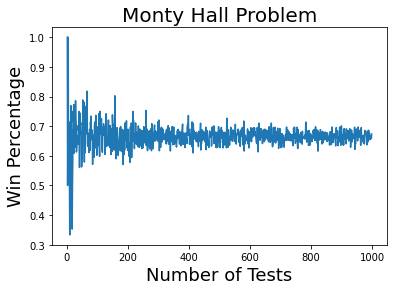

In [ ]:
#statistics for the simulation
trials = []
N = 1000
win_prob = []
switch = True

for i in range(1,N):
    trials.append(i)
    play = monty_hall(switch,i)
    win_prob.append(play[0]/play[4])
    
plt.plot(trials, win_prob)
plt.title('Monty Hall Problem', fontsize=20)
plt.xlabel('Number of Tests',fontsize=18)
plt.ylabel('Win Percentage',fontsize=18)
plt.show()
     

## QUESTION 2

Now we want to discuss a variant same problem but considering that the host does not know behind which door the car is (known in literature as ignorant monty or monty fall).


If the host doesn't know where the car is, things will change (and will be actually funny if he actually opens the door with the car). Remembering the equation
\begin{equation}
\mathcal{P}(C_2|H_3\,and\,X_1)=\frac{\mathcal{P}(C_2|X_1)\,\mathcal{P}(H_3|C_2\,and\,X_1)}{\mathcal{P}(H_3|X_1)}\,,
\end{equation}
let's see again the calculations separately.
* $\mathcal{P}(C_2|X_1)$ is exactly the same.
* $\mathcal{P}(H_3|I_1)$ varyes only conceptually, but not in value, because every choise between the two doors left will be now perfectly random and so
\begin{equation}
\mathcal{P}(H_3|C_1\,and\,X_1)=\mathcal{P}(H_3|C_2\,and\,X_1)=\mathcal{P}(H_3|C_3\,and\,X_1)=\frac{1}{2}\,.
\end{equation}
This implies that
\begin{equation}
\mathcal{P}(O_3|I_1)=\frac{1}{3}\Bigl[\frac{1}{2}+\frac{1}{2}+\frac{1}{2}\Bigr]=\frac{1}{2}\,.
\end{equation}
* As we said in the previous point,
\begin{equation}
\mathcal{P}(H_3|C_2\,and\,X_1)=\frac{1}{2}\,.
\end{equation}

So one has, for the probability to win changing the door,
\begin{equation}
\mathcal{P}(C_2|H_3\,and\,X_1)=\frac{\mathcal{P}(C_2|X_1)\,\mathcal{P}(H_3|C_2\,and\,X_1)}{\mathcal{P}(H_3|I_1)}=\frac{1/3\cdot{1/2}}{1/2}=\frac{1}{3}\,.
\end{equation}
For the probability to win not changing the door, this is perfectly equal to Q1:
\begin{equation}
\mathcal{P}(C_1|H_3\,and\,X_1)=\frac{\mathcal{P}(X_1|I_1)\,\mathcal{P}(H_3|C_1\,and\,X_1)}{\mathcal{P}(H_3|X_1)}=\frac{1/3\cdot1/2}{1/2}=\frac{1}{3}\,.
\end{equation}
Knowing that the host doesn't know where is the car allows the initial uniform distribution to mantain. The new information $H_3$ is, in this case, useless.\
The remaining third of the total probability goes in the probability of the car to be behind the door n. 3, or in other words in the probability that the host opens the door with the car behind.

### Code
Again, it's useful to visualize it with a simulation.

In [ ]:
def monty_fall (switch, trials):
    win_switch_counts = 0
    win_no_switch_counts = 0
    lose_switch_counts = 0
    lose_no_switch_counts = 0
    doors = [0,1,2]
    n_doors = len(doors)
    
    for i in range(0, trials):
        door_with_prize = random.randint(0, n_doors-1)
        player_pick = random.randint(0, n_doors -1)
        host = random.randint(0, n_doors-1)
        
        while host == player_pick :
            host = random.randint(0, n_doors-1)
            
        
        original_player_pick = player_pick
        opened_door = open_not_prize(host, n_doors, player_pick)
        
        if switch == True:
            player_pick = switch_door(opened_door, n_doors, player_pick)
        
        
        if player_pick == door_with_prize and switch == True: #the player wins if they switch
            win_switch_counts +=1
            
        elif player_pick!= door_with_prize and switch == True: #the player loses if they do not switch
            lose_switch_counts+=1    
            
  
    return win_switch_counts, lose_switch_counts, trials

#*****************************
#LET'S PLAY A GAME, SHALL WE? >:)

play = monty_fall(True, 100000)

print('winning by switching:' , (play[0]/play[2])*100 , '%', '(trials= 100000)')
#print('losing by switching:' , play[1]/play[2] , '%')
#print('winning by switching:' , play[1]/play[4] , '%')
#print('losing by switching:' , play[2]/play[4] , '%')



        
        

winning by switching: 33.51 % (trials= 100000)


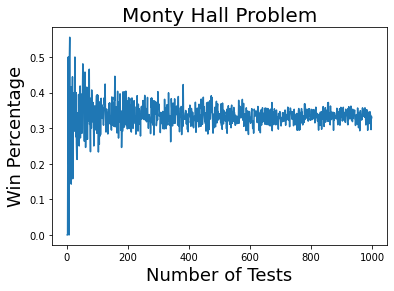

In [ ]:
#statistics for the simulation
trials = []
N = 1000
win_prob = []
switch = True

for i in range(1,N):
    trials.append(i)
    play = monty_fall(switch,i)
    win_prob.append(play[0]/play[2])
    
plt.plot(trials, win_prob)
plt.title('Monty Hall Problem', fontsize=20)
plt.xlabel('Number of Tests',fontsize=18)
plt.ylabel('Win Percentage',fontsize=18)
plt.show()
        

## QUESTION 3

In this case we don't know how the host choose and so we have to parametrize that unknown. The discrimination between the two case only enters when the host has to make the choise between doors n. 2 and n. 3. We have to set the missing knowledge precisely at that point.
* This means that we have to operate in the calculation of $\mathcal{P}(H_3|I_1)$, using the parameter $k\in[0,1]$, where $k=0$ when the host doesn't know where the car is and $k=1$ when the host knows perfectly where the car is. This translates into, assuming a linear behaviour of the unknown,
\begin{equation}
\begin{split}
\mathcal{P}(H_3|X_1)&=\frac{1}{3}\,\bigl[\mathcal{P}(H_3|C_1\,and\,X_1)+\mathcal{P}(H_3|C_2\,and\,X_1)+\mathcal{P}(H_3|C_3\,and\,X_1)\bigr]\\
&=\frac{1}{3}\Bigl[\frac{1}{2}+\frac{1+k}{2}+\frac{1-k}{2}\Bigr]=\frac{1}{2}\,.
\end{split}
\end{equation}
As we can see, $\mathcal{P}(H_3|X_1)$ doesn't care about this, because $\mathcal{P}(H_3|C_2\,and\,X_1)+\mathcal{P}(H_3|C_3\,and\,X_1)=1$, as we said in the first question.
* Anyway this means a lot for $\mathcal{P}(H_3|C_2\,and\,X_1)$, which now leads to
\begin{equation}
\mathcal{P}(H_3|C_2\,and\,X_1)=\frac{1+k}{2}\,.
\end{equation}

This implies that the probability to win changing the door is
\begin{equation}
\mathcal{P}(C_2|H_3\,and\,X_1)=\frac{\mathcal{P}(C_2|X_1)\,\mathcal{P}(H_3|C_2\,and\,X_1)}{\mathcal{P}(H_3|X_1)}=\frac{1/3\cdot{(1+k)/2}}{1/2}=\frac{1+k}{3}\,.\end{equation}
The probability to win not changing the door is instead invariant, since $\mathcal{P}(H_3|C_1\,and\,X_1)=1/2$, unaffected by the uncertainty parameter k:
\begin{equation}
\mathcal{P}(C_1|H_3\,and\,X_1)=\frac{\mathcal{P}(C_1|I_1)\,\mathcal{P}(H_3|C_1\,and\,X_1)}{\mathcal{P}(H_3|X_1)}=\frac{1/3\cdot1/2}{1/2}=\frac{1}{3}.
\end{equation}
Here too, the remaining probability goes in the probability of the car to be behind the door n. 3, or in other words in the probability that the host opens the door with the car behind.

This is exactly equal to calculate the weighted mean between the blindfolded case and the case in which the host knows were the car is. Those weights are obviously dependent on k as a parameter:
\begin{equation}
\mathcal{P}("\textit{winning  by  switching}",\;k) = k\times 2/3 + (1-k)\times 1/3
\end{equation}

Here it's interesting to notice how does it changes this probability with k, as it is shown in the plot below

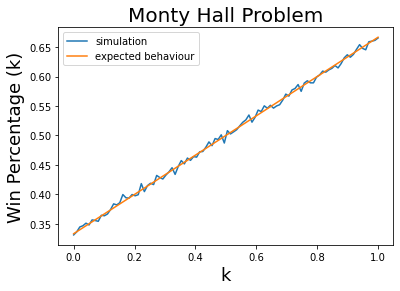

In [ ]:
#game simulation

def monty_hall (switch):
    win_switch_counts = 0
    win_no_switch_counts = 0
    lose_switch_counts = 0
    lose_no_switch_counts = 0
    doors = [0,1,2]
    n_doors = len(doors)
    
    
    door_with_prize = random.randint(0, n_doors-1)
    host = door_with_prize #because the host knows
    player_pick = random.randint(0, n_doors -1)
    original_player_pick = player_pick
    opened_door = open_not_prize(host, n_doors, player_pick)
        
    if switch == True:
        player_pick = switch_door(opened_door, n_doors, player_pick)
        
    if player_pick == host and switch == True: #the player wins if they switch
        win_switch_counts +=1
            
    elif player_pick!= host and switch == True: #the player loses if they do not switch
        lose_switch_counts+=1
            
    else:
        print('boh')
            
    return win_switch_counts

def monty_fall (switch):
    win_switch_counts = 0
    win_no_switch_counts = 0
    lose_switch_counts = 0
    lose_no_switch_counts = 0
    doors = [0,1,2]
    n_doors = len(doors)
    
    
    door_with_prize = random.randint(0, n_doors-1)
    player_pick = random.randint(0, n_doors -1)
    host = random.randint(0, n_doors-1)
        
    while host == player_pick :
        host = random.randint(0, n_doors-1)
            
        
    original_player_pick = player_pick
    opened_door = open_not_prize(host, n_doors, player_pick)
        
    if switch == True:
        player_pick = switch_door(opened_door, n_doors, player_pick)
        
  
    if player_pick == door_with_prize and switch == True: #the player wins if they switch
        win_switch_counts +=1
            
    elif player_pick!= door_with_prize and switch == True: #the player loses if they do not switch
        lose_switch_counts+=1         
  
    return win_switch_counts



#this function creates and array of 0 and 1, what does it mean? 
#it means that for each event, the host knows or doesn't know
#so what the k does is to create an array with a specific percentage of 0 and 1
#as suggested by the k 

def monty_random(k):
    hall_or_fall = random.uniform(0, 1)
    
    if hall_or_fall < k:
        play = monty_hall(True)
        
    else:
        play = monty_fall(True)
        
    return play

#*****************************
#LET'S PLAY A GAME, SHALL WE? >:)

k = np.linspace(0,1, 100)
N=10000
play= np.zeros(N, float)
count = np.zeros(len(k), float)

for j in range(len(k)):
    for i in range(N):
        play[i] = monty_random(k[j])
        if play[i] != 0:
            count[j] +=1


plt.plot(k, count/N, label='simulation')
plt.plot(k, (2/3*(k)) + (1/3*(1-k)), label='expected behaviour')
plt.title('Monty Hall Problem', fontsize=20)
plt.xlabel('k',fontsize=18)
plt.ylabel('Win Percentage (k)',fontsize=18)
plt.legend()
plt.show()
